# LSTM과 GRU 셀

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/9-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## LSTM 신경망 훈련하기

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)
# num_words=500으로 데이터셋에서 가장 자주 등장하는 단어 500개만 사용

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)
# 훈련 세트와 검증 세트를 8대2로 나눔

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)# maxlen=100으로 설정하여 train_input의 길이를 100으로 맞춤
val_seq = pad_sequences(val_input, maxlen=100) # maxlen=100으로 설정하여 val_input의 길이를 100으로 맞춤

In [4]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100)) # 임베딩 레이어 사용
model.add(keras.layers.LSTM(8)) # LSTM 사용
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_1 (LSTM)               (None, 8)                 800       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
# RMSProp의 학습률을 0.0001로 지정
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 24ms/step - loss: 0.6915 - accuracy: 0.5576 - val_loss: 0.6899 - val_accuracy: 0.5982
Epoch 2/100
 16/313 [>.............................] - ETA: 2s - loss: 0.6898 - accuracy: 0.5879

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 3s 9ms/step - loss: 0.6869 - accuracy: 0.6205 - val_loss: 0.6836 - val_accuracy: 0.6468
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6725 - accuracy: 0.6775 - val_loss: 0.6546 - val_accuracy: 0.6990
Epoch 4/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6172 - accuracy: 0.7110 - val_loss: 0.5911 - val_accuracy: 0.7084
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5717 - accuracy: 0.7254 - val_loss: 0.5635 - val_accuracy: 0.7280
Epoch 6/100
313/313 [==============================] - 5s 16ms/step - loss: 0.5431 - accuracy: 0.7484 - val_loss: 0.5361 - val_accuracy: 0.7516
Epoch 7/100
313/313 [==============================] - 5s 16ms/step - loss: 0.5193 - accuracy: 0.7685 - val_loss: 0.5161 - val_accuracy: 0.7642
Epoch 8/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5001 - accuracy: 0.7788 - val_loss: 0.4985 - val_accuracy: 0.7788
Epoch 9

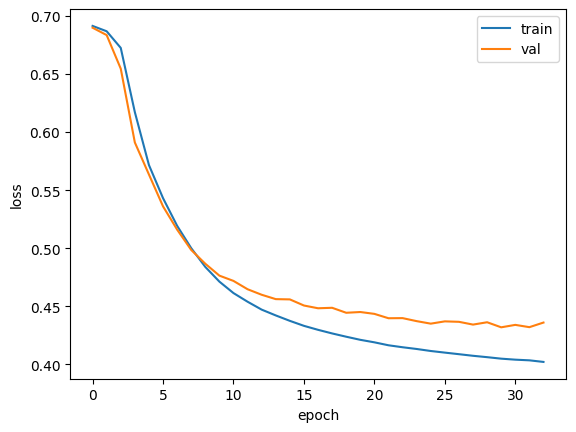

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 순환 층에 드롭아웃 적용하기

In [8]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3)) # 드롭아웃 적용
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [9]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 18ms/step - loss: 0.6921 - accuracy: 0.5410 - val_loss: 0.6910 - val_accuracy: 0.5862
Epoch 2/100
 19/313 [>.............................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5995

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 4s 13ms/step - loss: 0.6874 - accuracy: 0.6168 - val_loss: 0.6822 - val_accuracy: 0.6468
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6562 - accuracy: 0.6665 - val_loss: 0.6248 - val_accuracy: 0.7018
Epoch 4/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6115 - accuracy: 0.7023 - val_loss: 0.6016 - val_accuracy: 0.7082
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5921 - accuracy: 0.7214 - val_loss: 0.5852 - val_accuracy: 0.7222
Epoch 6/100
313/313 [==============================] - 3s 11ms/step - loss: 0.5772 - accuracy: 0.7323 - val_loss: 0.5680 - val_accuracy: 0.7474
Epoch 7/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5625 - accuracy: 0.7442 - val_loss: 0.5538 - val_accuracy: 0.7528
Epoch 8/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5492 - accuracy: 0.7513 - val_loss: 0.5420 - val_accuracy: 0.7556
Epoch 9/

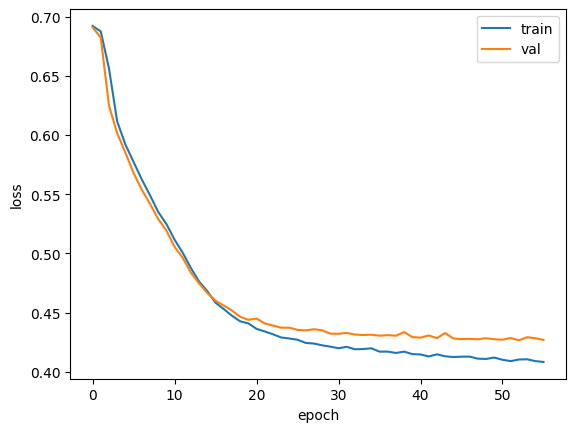

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show() # train, val loss 출력(시각화)

## 2개의 층을 연결하기

In [11]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))
# LSTM을 2층 쌓음
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_3 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_4 (LSTM)               (None, 8)                 544       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 26ms/step - loss: 0.6924 - accuracy: 0.5397 - val_loss: 0.6914 - val_accuracy: 0.5470
Epoch 2/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6869 - accuracy: 0.5939 - val_loss: 0.6787 - val_accuracy: 0.6542
Epoch 3/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6430 - accuracy: 0.6713 - val_loss: 0.5963 - val_accuracy: 0.7078
Epoch 4/100
313/313 [==============================] - 5s 16ms/step - loss: 0.5765 - accuracy: 0.7149 - val_loss: 0.5551 - val_accuracy: 0.7296
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5481 - accuracy: 0.7347 - val_loss: 0.5340 - val_accuracy: 0.7442
Epoch 6/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5289 - accuracy: 0.7491 - val_loss: 0.5122 - val_accuracy: 0.7596
Epoch 7/100
313/313 [==============================] - 5s 16ms/step - loss: 0.5115 - accuracy: 0.7595 - val_loss: 0.4986 - val_accuracy

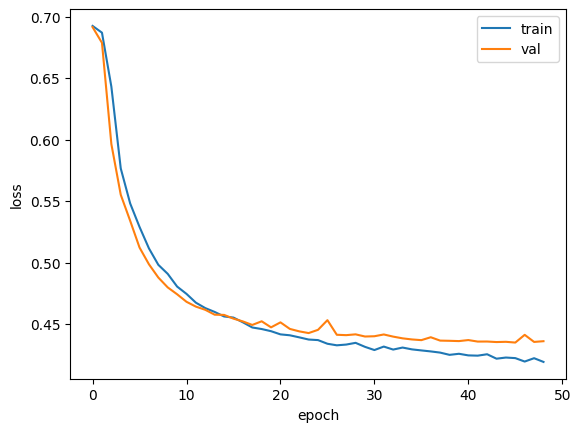

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## GRU 신경망 훈련하기

In [14]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8)) # LSTM대신 GRU사용
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 17ms/step - loss: 0.6917 - accuracy: 0.5434 - val_loss: 0.6909 - val_accuracy: 0.5588
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6887 - accuracy: 0.5885 - val_loss: 0.6874 - val_accuracy: 0.5880
Epoch 3/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6841 - accuracy: 0.6126 - val_loss: 0.6820 - val_accuracy: 0.6052
Epoch 4/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6765 - accuracy: 0.6256 - val_loss: 0.6732 - val_accuracy: 0.6246
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6642 - accuracy: 0.6432 - val_loss: 0.6581 - val_accuracy: 0.6370
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6439 - accuracy: 0.6602 - val_loss: 0.6326 - val_accuracy: 0.6620
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6077 - accuracy: 0.6906 - val_loss: 0.5853 - val_accuracy: 0.7

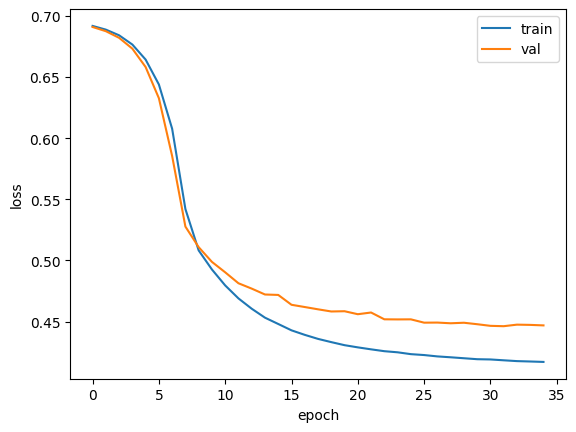

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 마무리

In [17]:
test_seq = pad_sequences(test_input, maxlen=100)
# maxlen=100으로 설정하여 test_input의 길이를 100으로 맞춤
rnn_model = keras.models.load_model('best-2rnn-model.h5')
# 텐서플로 2.3에서는 버그(https://github.com/tensorflow/tensorflow/issues/42890) 때문에 compile() 메서드를 호출해야 합니다.
# rnn_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')

rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 6s 6ms/step - loss: 0.4295 - accuracy: 0.7986


[0.42945054173469543, 0.7986400127410889]